<a href="https://colab.research.google.com/github/imAdityaSatya/DataAnalysis-Projects/blob/main/EV_Market_Size_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EVs Market Size Analysis**


Dataset Source: https://statso.io/market-size-of-evs-case-study/

In [ ]:
import pandas as pd
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
# df.dropna
df = df.dropna()

In [ ]:
df.shape

(177473, 17)

To analyze the overall market size of EVs, these are some crucial factors to look out for:

1. EV Adoption Over Time : Analyze the growth of the EV population by model year

2. Geographical Distribution : Understand where EVs are most commonly registered (like, by city or county)

3. EV Types : Breakdown of the dataset by electric vehicle type

4. Make and Model Popularity : Identify the most popular makes and models among the registered EVs

5. EV Range Analysis : Analyze the electric range of vehicles to see how EV technology is progressing

6. Estimated Growth in Market Size : Analyze and find the estimated growth in the market size of electric vehicles

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

**EV Adoption Over Time**

<ipython-input-23-eb4e1c76cf5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette="Reds")


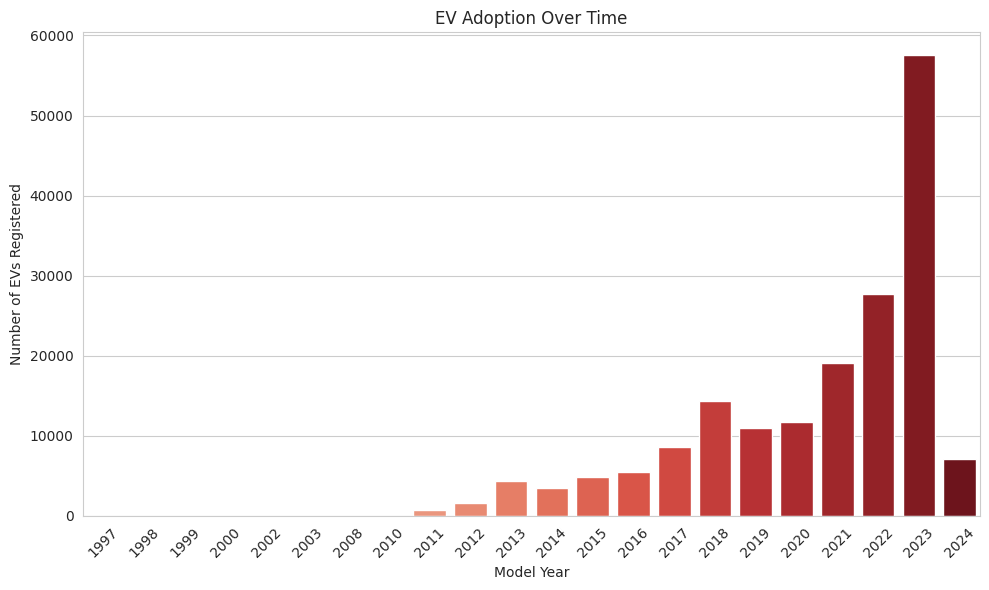

In [ ]:
plt.figure(figsize=(10, 6))
ev_adoption_by_year = df['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette="Reds")

plt.title("EV Adoption Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs Registered")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Geographical Distribution**

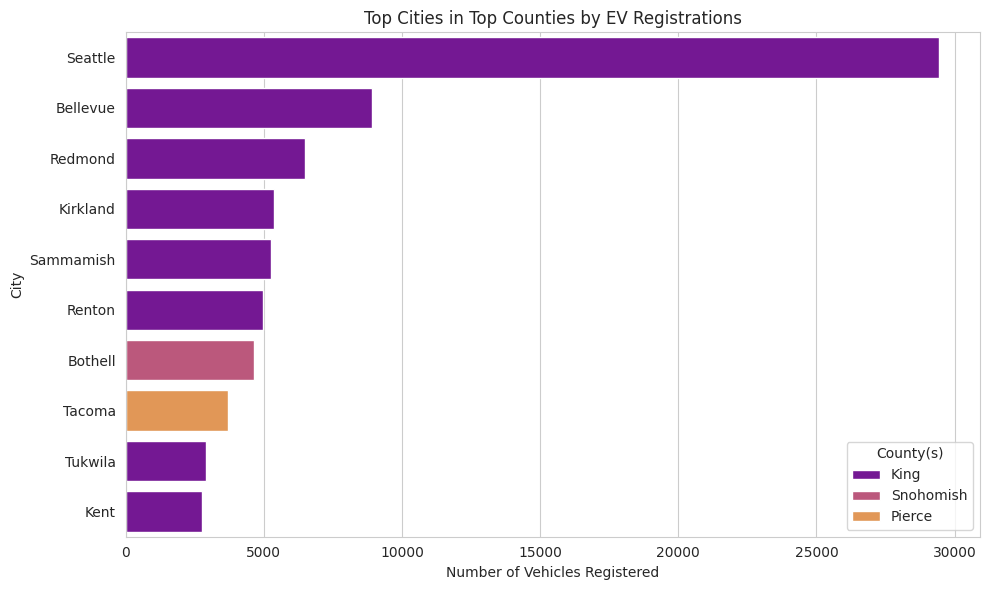

In [ ]:
# geographical distribution at county level
ev_county_distribution = df['County'].value_counts()
top_counties = ev_county_distribution.head(3).index   # Considering top-3 counties

# getting top counties data by filtering the dataset for these top counties
df_top_counties = df[df['County'].isin(top_counties)]

# analyzing the distribution of EVs within cities of these top counties
ev_city_distribution_top_counties = df_top_counties.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')


# visualize top 10 cities across these counties
top_cities =  ev_city_distribution_top_counties.head(10)    # Considering only top 10 for better clarity

plt.figure(figsize=(10, 6))
sns.barplot(x = "Number of Vehicles", y = "City", hue="County", data = top_cities, palette="plasma")

plt.title("Top Cities in Top Counties by EV Registrations")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("City")
plt.legend(title="County(s)")
plt.tight_layout()
plt.show()



**EV Types**

<ipython-input-25-1a22508b9eb4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_type_distribution.values, y = ev_type_distribution.index, palette="rocket")


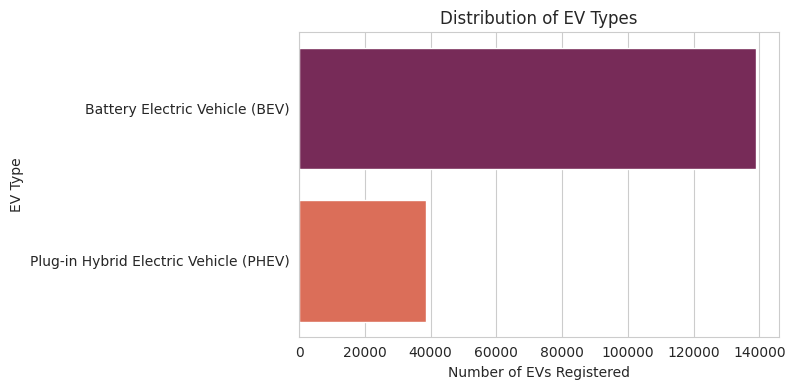

In [ ]:
# analyzing the distribution of EV types

ev_type_distribution = df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x = ev_type_distribution.values, y = ev_type_distribution.index, palette="rocket")

plt.title("Distribution of EV Types")
plt.xlabel("Number of EVs Registered")
plt.ylabel("EV Type")
plt.tight_layout()
plt.show()


**Make and Model Popularity**

<ipython-input-26-45720e623816>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_make_distribution.values, y = ev_make_distribution.index, palette="rocket")


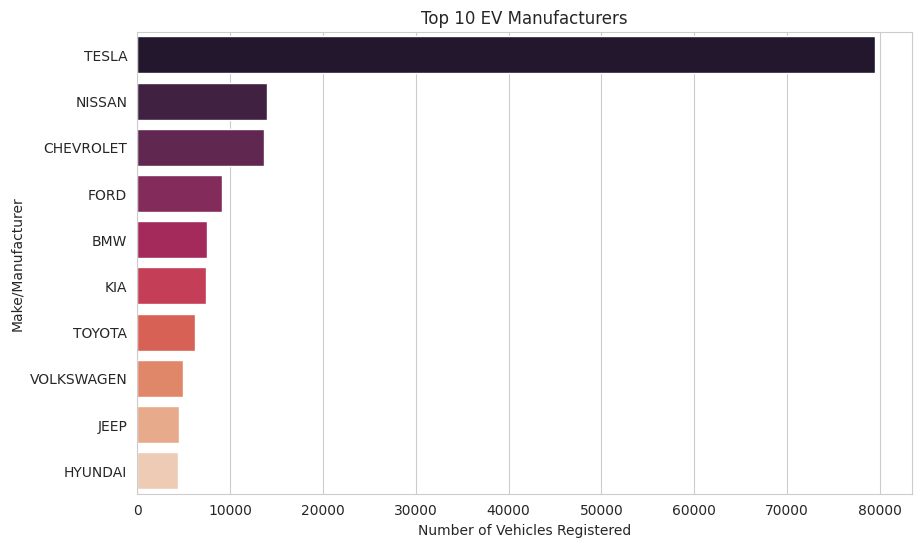

In [ ]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = df['Make'].value_counts().head(10)     # Considering only top 10 for better clarity

plt.figure(figsize=(10,6))
sns.barplot(x = ev_make_distribution.values, y = ev_make_distribution.index, palette="rocket")

plt.title("Top 10 EV Manufacturers")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Make/Manufacturer")
# plt.tight_layout()
plt.show()

Now, looking into most popular models within these top manufacturers to get an understanding of customer preferences at model level.

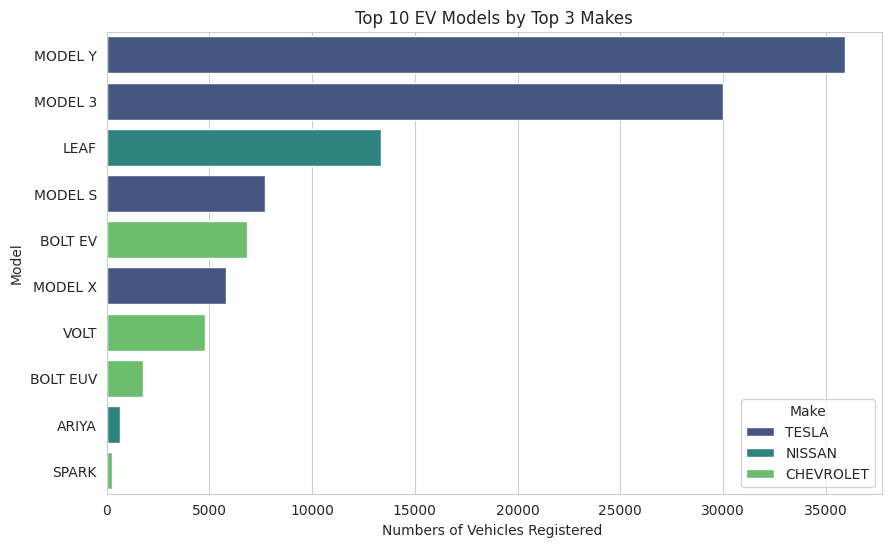

In [ ]:
# selecting top 3 manufacturers based on number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top 3 manufacturers
df_top_makes = df[df['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = df_top_makes.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name="Number of Vehicles")

# visualizing the top 10 models across these manufacturers for better clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x = "Number of Vehicles", y="Model", hue="Make", data = top_models, palette="viridis")

plt.title("Top 10 EV Models by Top 3 Makes")
plt.xlabel("Numbers of Vehicles Registered ")
plt.ylabel("Model")
plt.legend(title="Make")
# plt.tight_layout()
plt.show()



**Electric Range Analysis**

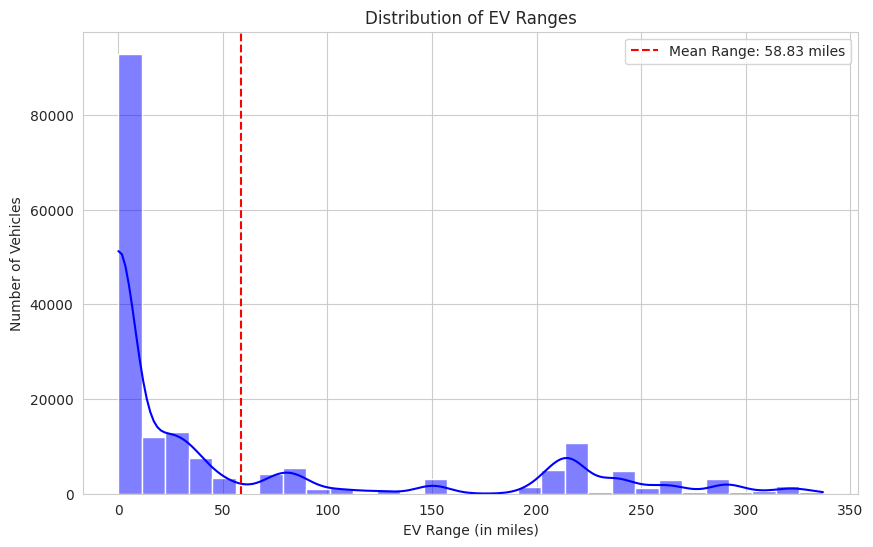

In [ ]:
# analyzing the distribution of electric range
plt.figure(figsize=(10,6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='blue')

plt.title("Distribution of EV Ranges")
plt.xlabel("EV Range (in miles)")
plt.ylabel("Number of Vehicles")
plt.axvline(df['Electric Range'].mean(), color='red', linestyle='dashed', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()
# plt.tight_layout()
plt.show()

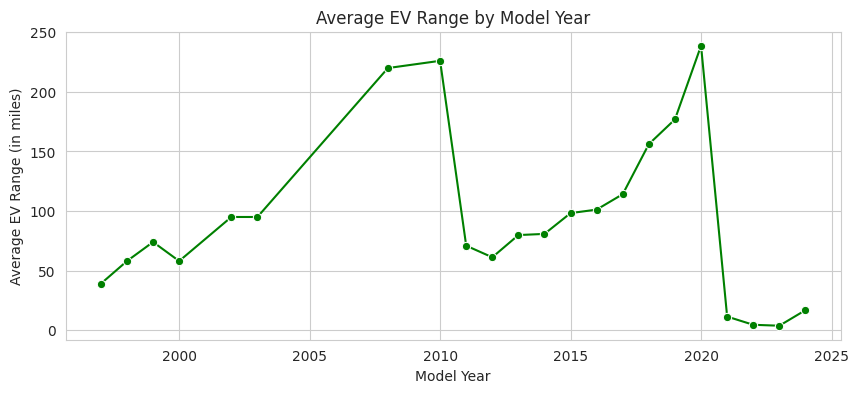

In [ ]:
# analyzing the trend of avg EV ranges over model years
avg_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(x = 'Model Year', y = 'Electric Range', data = avg_range_by_year, marker='o', color='green')

plt.title('Average EV Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average EV Range (in miles)')
plt.grid(True)
plt.show()

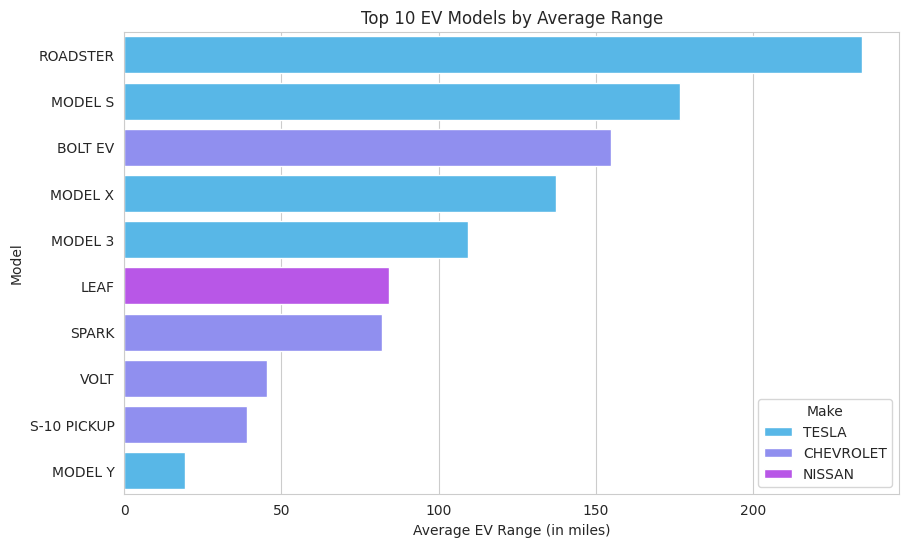

In [ ]:
# exploring how electric ranges vary among the top manufacturers and models

avg_range_by_model = df_top_makes.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average EV range
top_range_models = avg_range_by_model.head(10)

plt.figure(figsize=(10,6))
barplot = sns.barplot(x = "Electric Range", y="Model", hue="Make", data = top_range_models, palette="cool")

plt.title("Top 10 EV Models by Average Range")
plt.xlabel("Average EV Range (in miles)")
plt.ylabel("Model")
plt.legend(title="Make")
# plt.tight_layout()
plt.show()

**Finding Estimated Growth in Market Size**

In [ ]:
# counting the number of EVs registered every year
ev_count_by_year = df.groupby('Model Year').size().reset_index(name='Number of EVs')
ev_count_by_year

# ev_count_by_year = df['Model Year'].value_counts().sort_index()
# ev_count_by_year

,Model Year,Number of EVs
0,1997,1
1,1998,1
2,1999,5
3,2000,7
4,2002,2
5,2003,1
6,2008,19
7,2010,23
8,2011,775
9,2012,1614


In [ ]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
df_filtered_years = ev_count_by_year[ev_count_by_year['Model Year'] <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = df_filtered_years['Model Year'] - df_filtered_years['Model Year'].min()     # Using 'Model Year' column for x_data
y_data = df_filtered_years['Number of EVs'].values      # Using the 'Number of EVs' column for y_data

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
future_years = np.arange(2024, 2024 + 6)
forecast_years_scaled = future_years - df_filtered_years['Model Year'].min()   # future years scaled/adjusted to match the x_data scale
forecasted_values = exp_growth(forecast_years_scaled, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_EVs = dict(zip(future_years, forecasted_values))

print("Forecasted EV Registrations:")
for year, count in forecasted_EVs.items():
    print(f"{year}: {count:.2f}")

Forecasted EV Registrations:
2024: 79079.21
2025: 119653.97
2026: 181047.23
2027: 273940.76
2028: 414497.04
2029: 627171.36


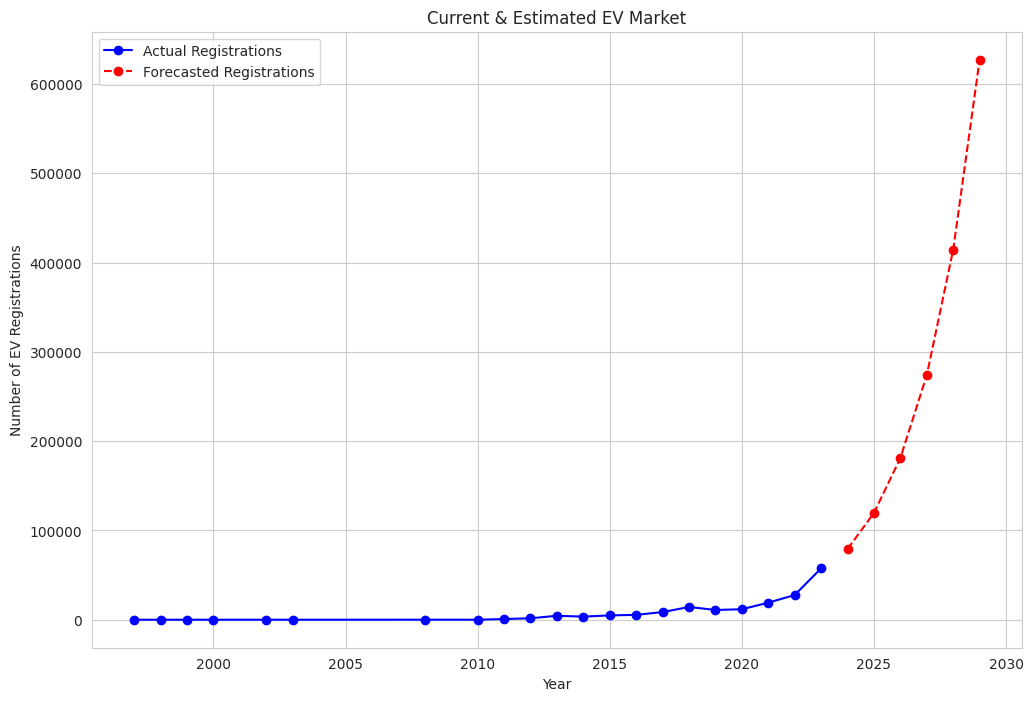

In [ ]:
# prepare data for plotting
years = np.arange(df_filtered_years['Model Year'].min(), 2029 + 1)
actual_years = df_filtered_years['Model Year']
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = df_filtered_years['Number of EVs'].values
forecasted_values_full = [forecasted_EVs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

Forecasted EV Registrations (Linear Regression on Log-transformed Data):
2024: 107636.41
2025: 165280.18
2026: 253794.29
2027: 389710.94
2028: 598415.91
2029: 918890.02



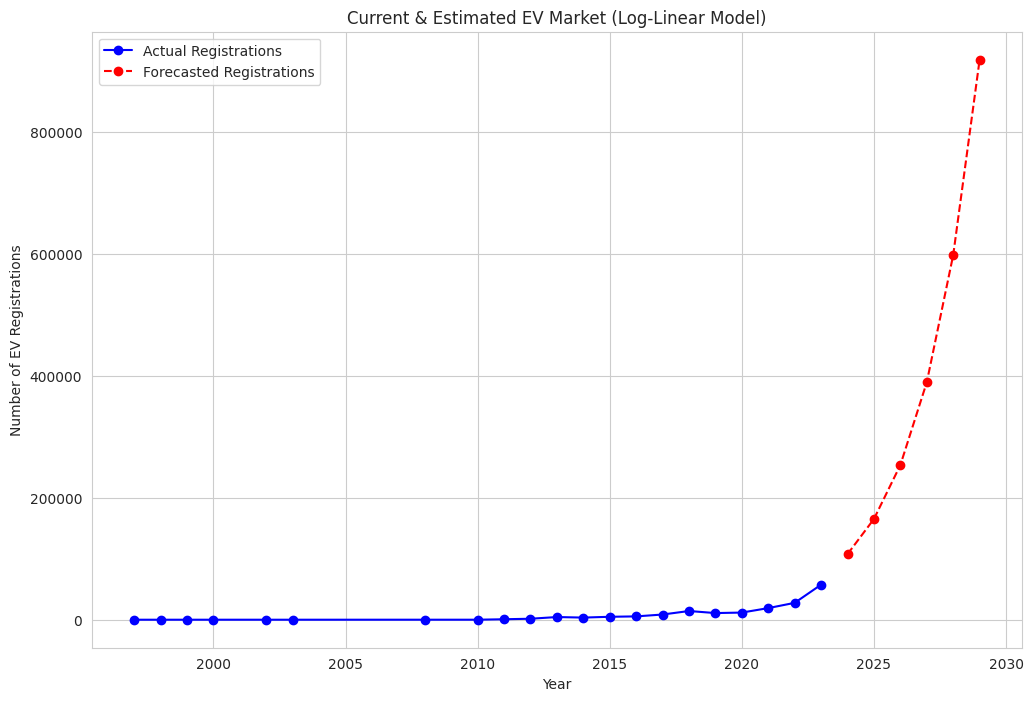

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
x_data = ev_count_by_year['Model Year'].values.reshape(-1, 1)
y_data = ev_count_by_year['Number of EVs'].values

# Filter data up to 2023
x_train = x_data[x_data[:, 0] <= 2023]
y_train = y_data[x_data[:, 0] <= 2023]

# Transform the target variable (Number of EVs) using log
y_train_log = np.log(y_train + 1)     # Added a small constant '1' to avoid issues with log(0)

# Create and train the linear model on the log-transformed data
model = LinearRegression()
model.fit(x_train, y_train_log)

# Forecast future years
future_years = np.arange(2024, 2030).reshape(-1, 1)

# Predict on the log-transformed scale
forecasted_values_log = model.predict(future_years)

# Inverse transform the predictions to the original scale (exponential)
forecasted_values = np.exp(forecasted_values_log) - 1   # Subtract the constant added earlier

# Display forecasted values
print("Forecasted EV Registrations (Linear Regression on Log-transformed Data):")
for year, count in zip(future_years.flatten(), forecasted_values):
    print(f"{year}: {max(0, count):.2f}")   # Using max(0, count) avoiding negative forecasts
print()

# Visualize the results
plt.figure(figsize=(12, 8))
plt.plot(x_train.flatten(), y_train, 'bo-', label='Actual Registrations')
plt.plot(future_years.flatten(), forecasted_values, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market (Log-Linear Model)')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()